# PCA on Coherence Data
Principal component analysis (PCA) can be used to reduce the dimensionality of a data set and can be helpful to visualize patterns, or clusters, in the underlying data.  This notebook will describe how we used PCA to visualize the "state" of a mouse overtime.

## Extracting data from NeuroExplorer

This process is much like what is used for plotting coherence for a single time bin; our NeuroExplorer template `coherence_4_tetrodes.ntp` is still used, but the script `coherence_4_tetrodes_overtime.py` applies it many times over a given recording for smaller chunks of data.  The output is a "superfolder" with subfolders corresponding to each time bin, all filled with `.csv` files of the coherence data.

The example data used in this notebook was generated using the following steps:
1. Open the recording data file (from Plexon) in NeuroExplorer.  **All the LFPs are labeled using "FP##"** (this is how the code finds them).
2. Open the script `coherence_4_tetrodes_overtime.py` in NeuroExplorer's IDE.
3. Within the "parameters" section of the script, make sure the `template` variable points to the template `coherence_4_tetrodes`.  Double check that all other settings are appropriate.  The `bin_size` argument is what determines the output frequency.
4.  Run the script!

The output of this process is the folder `coherence overtime plot data` within the `exampledata` folder.  The example was generated from a recording of an animal with two 16-channel arrays, one in  the orbitofrontal cortex (OFC) and one in the dorsomedial striatum (DMS).  This mouse was given an i.p. injection of cocaine partway through the recording.

Note that the script will try to write a `movement.csv` file using a variable "Motion" which is based on mouse tracking data.  This may need to be removed or modified depending on if you have tracking data & how it is loaded into NeuroExplorer.

## Computing PCs

First we import `coherence.py`.

In [1]:
import coherence as co

Now, loading the data.  The goal is to generate a matrix where each row corresponds to a time bin and each column corresponds to the value of each principal component (PC) at that time.  To start, we can use `co.Coherence_1D_Overtime()`, which loads the data as a single _n\*k_  matrix, where _n_ is the number of time points and _k_ is the number of coherence connections.  In this case, with 32 wires there are 1024 coherence pairs (32\*32).

At this point, we can select which wire pairs to include.  Passing no additional arguments to `co.Coherence_1D_Overtime()` will load every connection.  To slice the data, we can pass `co.Region()` instances as additional keyword arguments.  Below, I will select only the cells that correspond to coherence values between wires of the OFC and DMS.  As this intersecton constitutes only 16\*16 wires, this limits the data to 256 coherence values.

As `co.Region()` objects in keyword arguments are used for slicing data, they are not used for labelling wires.  To do so, there is a `wirenames` argument which accepts a lists.  As the data will ultimately be converted to PCs, this step is not crucial.

In [2]:
#path to the data
data = r"exampledata\pca data"

#Region() objects for labelling wirenames
OFC = co.Region('OFC', range(1,16))
DMS = co.Region('DMS', range(17,32))

#Region() objects for slicing the data to run PCA on
OFC_DMS = co.Region('OFC-DMS', range(1,16), range(17,32))

#building the data
mouse1 = co.Coherence_1D_Overtime(data,
                                  band='gamma',
                                  wirenames=[OFC,DMS],
                                  ofc_dms=OFC_DMS)

----------

Trying to compute coherence data for "exampledata\pca data".


Starting loop:

exampledata\pca data\0_0-60 processed
exampledata\pca data\1_60-120 processed
exampledata\pca data\2_120-180 processed
exampledata\pca data\3_180-240 processed
exampledata\pca data\4_240-300 processed
exampledata\pca data\5_300-360 processed
exampledata\pca data\6_360-420 processed
exampledata\pca data\7_420-480 processed
exampledata\pca data\8_480-540 processed
exampledata\pca data\9_540-600 processed
exampledata\pca data\10_600-660 processed
exampledata\pca data\11_660-720 processed
exampledata\pca data\12_720-780 processed
exampledata\pca data\13_780-840 processed
exampledata\pca data\14_840-900 processed
exampledata\pca data\15_900-960 processed
exampledata\pca data\16_960-1020 processed
exampledata\pca data\17_1020-1080 processed
exampledata\pca data\18_1080-1140 processed
exampledata\pca data\19_1140-1200 processed
exampledata\pca data\20_1200-1260 processed
exampledata\pca data\21_1260-132

We can then examine the data to make sure they look correct.  Data are stored in the `data` attribute.

In [3]:
mouse1.data

,OFC 1 x DMS 1,OFC 1 x DMS 2,OFC 1 x DMS 3,OFC 1 x DMS 4,OFC 1 x DMS 5,OFC 1 x DMS 6,OFC 1 x DMS 7,OFC 1 x DMS 8,OFC 1 x DMS 9,OFC 1 x DMS 10,...,OFC 16 x DMS 7,OFC 16 x DMS 8,OFC 16 x DMS 9,OFC 16 x DMS 10,OFC 16 x DMS 11,OFC 16 x DMS 12,OFC 16 x DMS 13,OFC 16 x DMS 14,OFC 16 x DMS 15,OFC 16 x DMS 16
Time (s),,,,,,,,,,,,,,,,,,,,,
0,0.168045,0.170505,0.050558,0.115753,0.157081,0.141464,0.127838,0.151115,0.102509,0.098048,...,0.082834,0.092489,0.069566,0.072520,0.086525,0.094866,0.034536,0.074970,0.090931,0.098043
60,0.162994,0.164879,0.059974,0.117410,0.151464,0.140499,0.131674,0.148213,0.106430,0.101266,...,0.075473,0.079240,0.060658,0.057887,0.082981,0.086146,0.040518,0.074668,0.086981,0.089691
120,0.202920,0.198888,0.063260,0.140494,0.184583,0.172732,0.157392,0.178993,0.131783,0.119906,...,0.091321,0.101064,0.080581,0.071940,0.101465,0.109545,0.045679,0.091263,0.105504,0.112858
180,0.182810,0.184016,0.057810,0.127873,0.168543,0.156961,0.144433,0.164591,0.121090,0.112725,...,0.079573,0.086056,0.064650,0.063205,0.090972,0.094760,0.040720,0.081920,0.093625,0.099017
240,0.212171,0.214963,0.059412,0.137354,0.193016,0.182561,0.158348,0.181733,0.132525,0.120838,...,0.085065,0.092941,0.074655,0.071092,0.096267,0.101924,0.041089,0.088256,0.101361,0.106238
300,0.189270,0.189253,0.068643,0.132422,0.175383,0.160798,0.149004,0.165184,0.118386,0.109617,...,0.084895,0.092909,0.078160,0.075320,0.099865,0.102015,0.040737,0.090844,0.101052,0.108327
360,0.201249,0.206081,0.059948,0.144652,0.180613,0.174644,0.160531,0.186071,0.134901,0.131027,...,0.086818,0.098538,0.077526,0.076409,0.097673,0.105404,0.040743,0.087347,0.100946,0.107972
420,0.231871,0.230826,0.074642,0.170980,0.217578,0.206277,0.193334,0.215133,0.164228,0.149101,...,0.106538,0.114700,0.093748,0.087932,0.123088,0.124632,0.052296,0.111452,0.123443,0.130708
480,0.241697,0.243095,0.070758,0.159834,0.214955,0.208845,0.185597,0.205985,0.156978,0.143333,...,0.098901,0.109183,0.086513,0.085650,0.116434,0.122203,0.048337,0.105582,0.120038,0.127003


This matrix is properly formatted for running principal component analysis.  To compute PCs, we use the class `co.Coherence_PCA()`, which makes use of scikit-learn's `sklearn.decomposition.PCA`.  The second parameter is used to specify how many PCs to compute.

In [4]:
mouse1_pca = co.Coherence_PCA(mouse1, 10)
mouse1_pca.data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Time (s),,,,,,,,,,
0,1.389207,0.016744,-0.187557,0.082760,0.049500,0.000222,-0.007116,-0.003037,0.042593,-0.007973
60,1.489560,0.042657,-0.189598,0.072194,0.004314,-0.022107,-0.009960,-0.002842,0.037103,-0.012261
120,1.025095,-0.075558,-0.118040,0.082264,0.031954,0.013887,0.013087,-0.010949,0.007608,-0.010003
180,1.360205,0.035392,-0.223695,0.109545,-0.013527,-0.049641,0.018093,-0.016293,0.052991,0.037080
240,1.130813,-0.002651,-0.133938,0.116459,-0.019282,-0.009220,-0.008136,-0.015084,-0.001189,0.031404
300,1.331505,0.026733,-0.177118,0.092059,-0.021406,-0.038451,0.035077,-0.023377,0.034219,0.006250
360,1.057942,-0.074888,-0.107071,0.094579,0.062156,-0.016423,0.014510,-0.052658,0.004579,-0.011955
420,0.775670,-0.112482,-0.065394,0.087988,0.067385,-0.044079,0.013837,-0.018920,0.011708,-0.057267
480,0.716292,-0.136376,-0.071116,0.101808,-0.004779,-0.003279,0.011259,-0.024431,-0.001155,0.005246


## Plotting
With an instance of `co.Coherence_PCA`, there are built in methods for visualizing the data.

### PCA line plot
View the movement of the mouse through PCA space overtime.

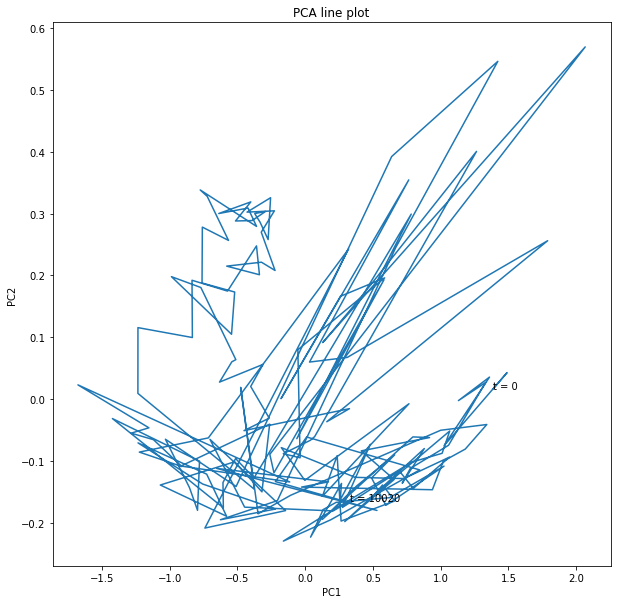

In [5]:
plot = mouse1_pca.line_plot()

### Limit the data with `Timeframe()`
Instances of `co.Timeframe` can be passed to segment the plotted data.  In this case, we use them to show 30 minutes of data before and after cocaine was injected into this mouse.

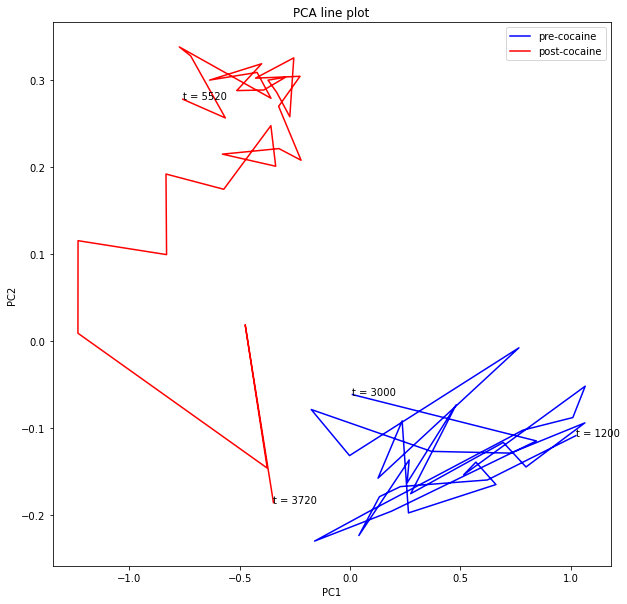

In [6]:
pre = co.Timeframe(name='pre-cocaine',
                   start_sec=1200,
                   end_sec=3000,
                   color='blue')
post = co.Timeframe(name='post-cocaine',
                   start_sec=3700,
                   end_sec=5500,
                   color='red')

plot = mouse1_pca.line_plot(pre,post)

### Plot a 2D Heatmap
Using `kdeplot` from seaborn.

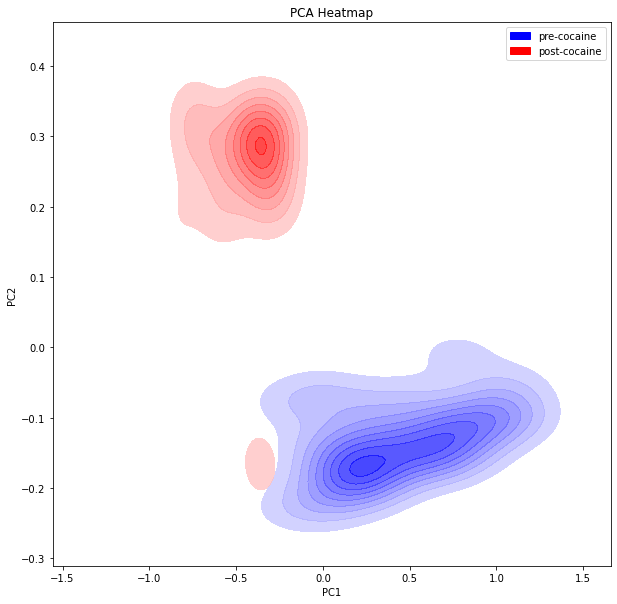

In [7]:
plot = mouse1_pca.heatmap(pre,post)

### Show the explained varaince ratio

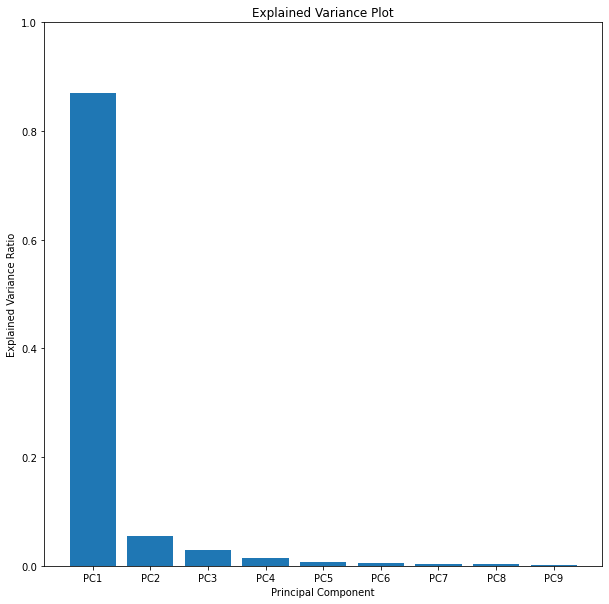

In [8]:
plot = mouse1_pca.scree_plot()

### Animated line plot

Animations can be saved used the `save` method:
```
mouse1_pca.animated_line_plot(pre,post).save('my animation.gif', dpi=300)
```

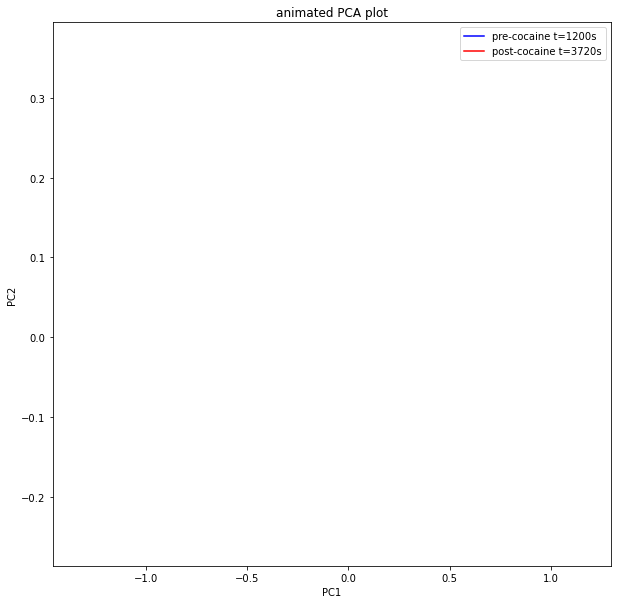

In [9]:
plot = mouse1_pca.animated_line_plot(pre,post)

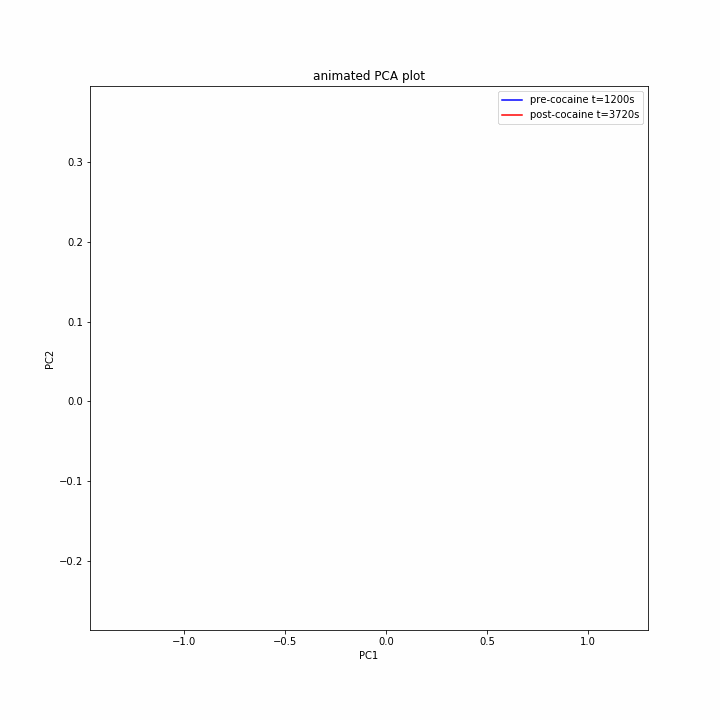

In [10]:
#using Ipython.display to render the gif in the notebook
from IPython.display import Image

with open(r'img/pca animation.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

# Updates/Bugs

*nothing to say here yet!*